In [15]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.metrics import auc, roc_auc_score, roc_curve

import matplotlib.pyplot as plt

In [2]:
# !wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv

--2025-10-11 20:24:37--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80876 (79K) [text/plain]
Saving to: ‘course_lead_scoring.csv’

course_lead_scoring 100%[===================>]  78.98K  --.-KB/s    in 0.001s  

2025-10-11 20:24:37 (70.6 MB/s) - ‘course_lead_scoring.csv’ saved [80876/80876]



### Data preparation

In [2]:
df = pd.read_csv('course_lead_scoring.csv')

In [24]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,1452,1453,1454,1455,1456,1457,1458,1459,1460,1461
lead_source,paid_ads,social_media,events,paid_ads,referral,events,social_media,social_media,referral,paid_ads,...,organic_search,paid_ads,referral,referral,social_media,referral,referral,paid_ads,referral,organic_search
industry,NA,retail,healthcare,retail,education,manufacturing,technology,NA,healthcare,other,...,retail,education,finance,finance,healthcare,manufacturing,technology,technology,NA,finance
number_of_courses_viewed,1,1,5,2,3,1,0,5,4,3,...,1,2,0,2,1,1,3,1,5,3
annual_income,79450.0,46992.0,78796.0,83843.0,85012.0,59904.0,51283.0,62975.0,38648.0,59866.0,...,49154.0,65742.0,75546.0,0.0,45253.0,0.0,65259.0,45688.0,71016.0,92855.0
employment_status,unemployed,employed,unemployed,NA,self_employed,NA,NA,student,unemployed,student,...,student,employed,NA,NA,NA,self_employed,student,student,self_employed,student
location,south_america,south_america,australia,australia,europe,africa,middle_east,europe,south_america,australia,...,africa,australia,asia,south_america,australia,north_america,europe,north_america,north_america,north_america
interaction_count,4,1,3,1,3,6,2,4,2,3,...,4,0,0,3,6,4,2,3,0,3
lead_score,0.94,0.8,0.69,0.87,0.62,0.83,0.57,0.62,0.86,0.43,...,0.37,0.57,0.1,0.47,0.24,0.53,0.24,0.02,0.25,0.41
converted,1,0,1,0,1,1,0,1,1,1,...,1,0,0,1,1,1,1,1,1,1


In [4]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [5]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [6]:
df.lead_source = df.lead_source.fillna('NA')
df.industry = df.industry.fillna('NA')
df.employment_status = df.employment_status.fillna('NA')
df.location = df.location.fillna('NA')
df.annual_income = df.annual_income.fillna(0.0)

In [27]:
numerical = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']

In [25]:
categorical = list(df_train.dtypes[df_train.dtypes == 'object'].index)

In [28]:
numerical+categorical

['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score',
 'lead_source',
 'industry',
 'employment_status',
 'location']

In [7]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

del df_train['converted']
del df_val['converted']
del df_test['converted']

In [8]:
len(df_train), len(df_val), len(df_test)

(876, 293, 293)

0.7635680590007088

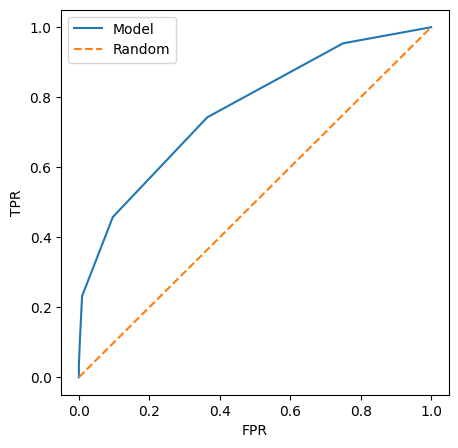

In [17]:
fpr, tpr, thresholds = roc_curve(y_train, df_train.number_of_courses_viewed)
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()
auc(fpr, tpr)

0.5519578313253012

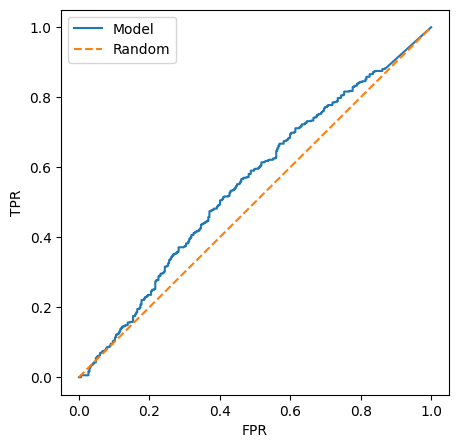

In [18]:
fpr, tpr, thresholds = roc_curve(y_train, df_train.annual_income)
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()
auc(fpr, tpr)

0.738270176293409

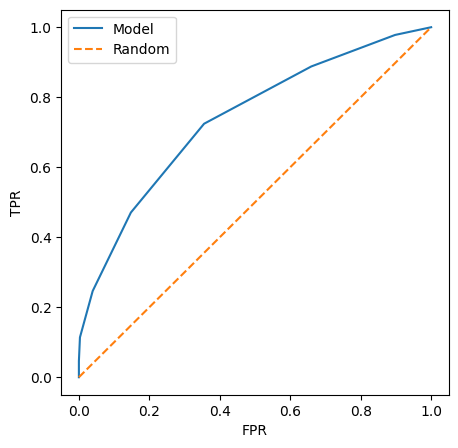

In [19]:
fpr, tpr, thresholds = roc_curve(y_train, df_train.interaction_count)
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()
auc(fpr, tpr)

0.6144993577250176

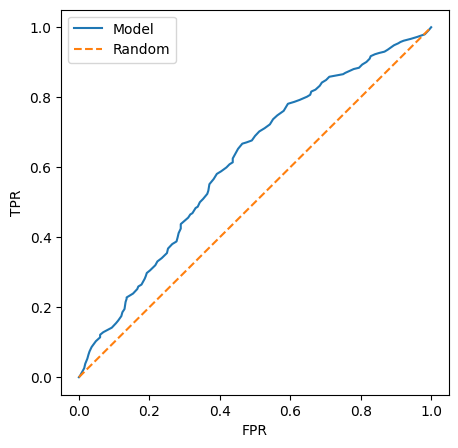

In [20]:
fpr, tpr, thresholds = roc_curve(y_train, df_train.lead_score)
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()
auc(fpr, tpr)

In [23]:
 roc_auc_score(y_train, df_train.lead_score)

0.6144993577250176

In [ ]:
auc()

In [27]:
for c in categorical:
    val = mutual_info_score(df_train[c], y_train)
    print(f'{c} - {round(val,2)}')

lead_source - 0.04
industry - 0.01
employment_status - 0.01
location - 0.0


### Question 4

In [50]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [51]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [52]:
# to match HW values the accuracy has to be obtained on train data
y_pred = model.predict_proba(X_val)[:, 1]
converted_decision = (y_pred >= 0.5)
acc_full = (y_val == converted_decision).mean()
acc_full

np.float64(0.6996587030716723)

In [48]:
feats = categorical + numerical
for f in feats:
    feat_list = [x for x in feats if x != f]
    train_dict = df_train[feat_list].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)
    val_dict = df_val[feat_list].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    converted_decision = (y_pred >= 0.5)
    acc = (y_val == converted_decision).mean()
    print(f'Without {f} - the diff is {round(acc_full-acc,6)}')

Without lead_source - the diff is -0.003413
Without industry - the diff is 0.0
Without employment_status - the diff is 0.003413
Without location - the diff is -0.010239
Without number_of_courses_viewed - the diff is 0.143345
Without annual_income - the diff is -0.153584
Without interaction_count - the diff is 0.143345
Without lead_score - the diff is -0.006826


### Question 6

In [55]:
C_values = [0.01, 0.1, 1, 10, 100]

for c_val in C_values:
    train_dict = df_train[categorical + numerical].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)
    
    val_dict = df_val[categorical + numerical].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    model = LogisticRegression(solver='liblinear', C=c_val, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict_proba(X_val)[:, 1]
    converted_decision = (y_pred >= 0.5)
    acc = (y_val == converted_decision).mean()
    print(f'{c_val} - {round(acc,9)}')

0.01 - 0.699658703
0.1 - 0.699658703
1 - 0.699658703
10 - 0.699658703
100 - 0.699658703
